In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_df=pd.read_csv(r'dataset/housing_data.csv',parse_dates=['period_begin','period_end'])

In [3]:
housing_df.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,NaN,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325.0,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577.0,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22.0,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12.0,54.0,55.0,151.2,158062.5,38.300000


In [8]:
sorted_index_df=housing_df.set_index(['period_begin']).sort_index()

In [9]:
ca_housing=sorted_index_df[sorted_index_df['region_name'].str.contains('CA')]
ca_housing=ca_housing.assign(region_name=ca_housing['region_name'].str[0:-11]).query("region_name=='Butte'")
ca_housing

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Butte,2017-03-26,467.0,446.0,498.0,71.0,291315.3,13.564124
2017-01-09,Butte,2017-04-02,494.0,448.0,502.0,67.2,292348.2,12.815394
2017-01-16,Butte,2017-04-09,508.0,453.0,508.0,63.5,293514.9,12.660782
2017-01-23,Butte,2017-04-16,530.0,459.0,515.0,60.1,294619.1,12.295126
2017-01-30,Butte,2017-04-23,571.0,465.0,524.0,56.4,295527.4,11.251114
...,...,...,...,...,...,...,...,...
2022-03-28,Butte,2022-06-19,644.0,404.0,461.0,30.0,462903.3,8.760450
2022-04-04,Butte,2022-06-26,634.0,419.0,476.0,30.4,462153.3,9.168036
2022-04-11,Butte,2022-07-03,638.0,431.0,489.0,31.5,461320.0,9.351122


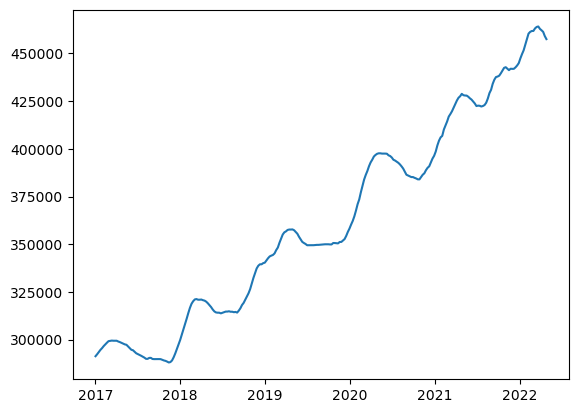

In [10]:
fig,ax=plt.subplots()
ax.plot(ca_housing.index,ca_housing['median_active_list_price'])
plt.show()

# Combo Chart

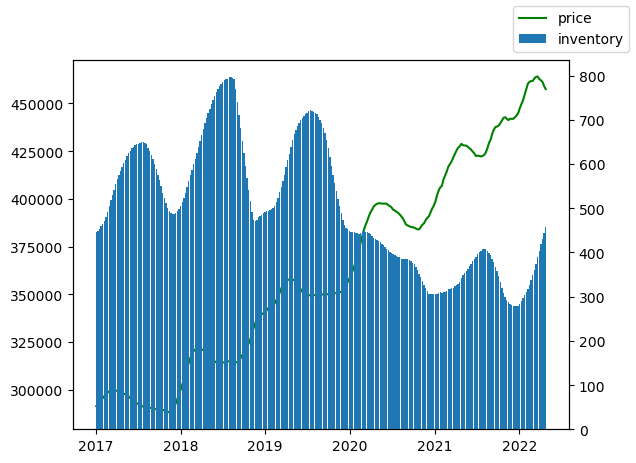

In [11]:
fig,ax=plt.subplots()
ax.plot(ca_housing['median_active_list_price'],
      color='green',
      #alpha=.4,
      label='price')
ax2=ax.twinx()
ax2.bar(ca_housing.index,
       ca_housing.inventory,
       width=6,
        #alpha=.3,
       label='inventory')
fig.legend()

In [12]:
pie_df=housing_df.head(10)
pie_df=pie_df.groupby('region_name')[['total_homes_sold']].sum() #.agg({'total_homes_sold':"sum"})
pie_df=pie_df.query("region_name in ['Allendale County, SC','Holmes County, OH','Neosho County, KS']")
pie_df


,total_homes_sold
region_name,
"Allendale County, SC",5.0
"Holmes County, OH",22.0
"Neosho County, KS",19.0


(-1.0999947048578538,
 1.0999907956661175,
 -1.1141222941300806,
 1.3968116383264975)

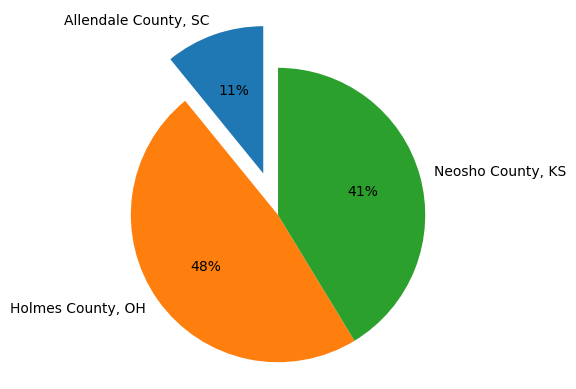

In [13]:
fig,ax=plt.subplots()
ax.pie(pie_df['total_homes_sold'],
       labels=pie_df.index,
      startangle=90,
      autopct='%.0f%%',
      explode=(.3,0,0))
ax.axis('equal') #equal,scaled


Text(0.5, 1.0, 'Brazil')

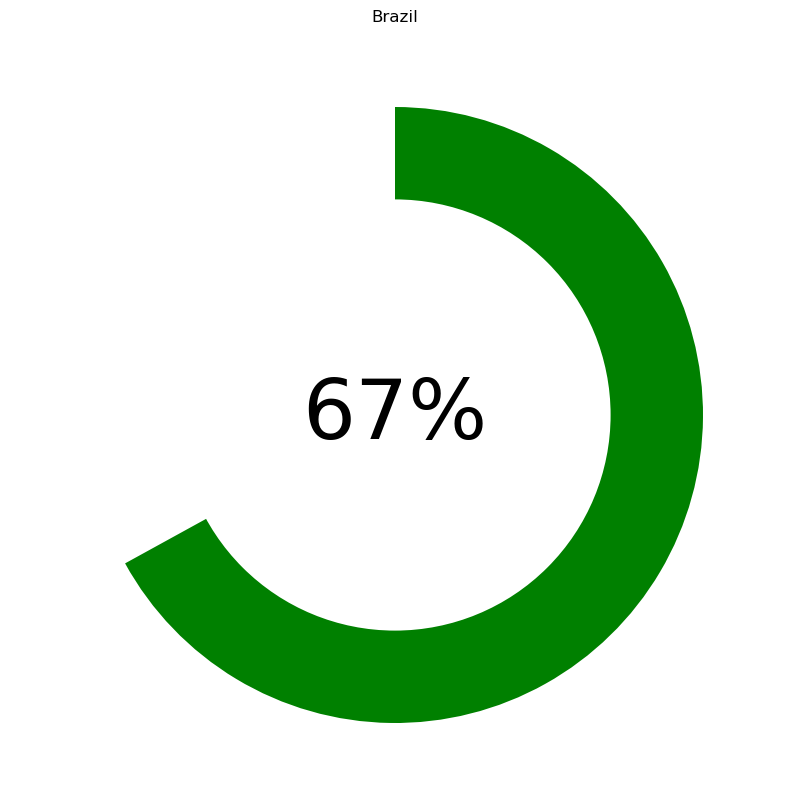

In [91]:
fig,ax=plt.subplots(figsize=(10,10))
ax.pie([.33,.67],
      startangle=90,
      pctdistance=.85,
      colors=['white','green'])
hole=plt.Circle((0,0),0.70,fc='white')
ax.add_artist(hole)
#fig=plt.gcf() # get figure
#fig.gca().add_artist(hole)
#plt.text(0,0,'67%',ha='center',va='center',fontsize=60)
#ax.add_artist(hole)
ax.text(0,0,'67%',ha='center',va='center',fontsize=60)
ax.set_title("Brazil")

# Scatter and Bubble Chart

In [32]:
housing_df.head()
housing_100=housing_df.iloc[0:100]
housing_100

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,NaN,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325.0,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577.0,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22.0,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12.0,54.0,55.0,151.2,158062.5,38.300000
...,...,...,...,...,...,...,...,...,...
95,"Alexandria, VA",2018-09-10,2018-12-02,611.0,489.0,550.0,42.1,572586.6,11.818984
96,"Wabash County, IN",2022-01-24,2022-04-17,68.0,60.0,67.0,35.0,134400.0,12.682341
97,"Pierce County, GA",2018-01-08,2018-04-01,NaN,1.0,1.0,187.4,108750.0,NaN
98,"Lewis County, TN",2020-05-04,2020-07-26,35.0,38.0,42.0,64.4,172841.4,14.245455


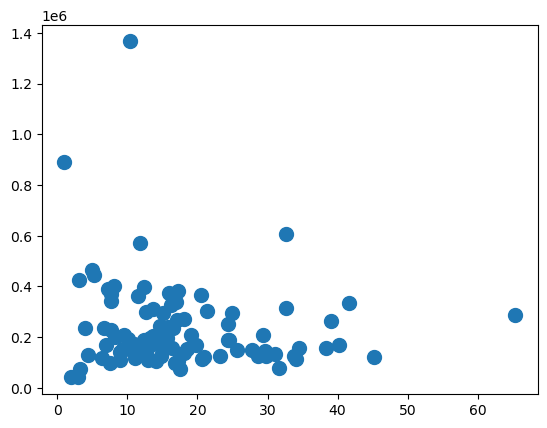

In [37]:
fig,ax=plt.subplots()
ax.scatter(housing_100['months_of_supply'],housing_100['median_active_list_price'],s=100)

scatter plot:- https://www.tableau.com/data-insights/reference-library/visual-analytics/charts/scatter-plots

In [38]:
# Histogram

In [51]:
housing_df
LA_df=housing_df.loc[housing_df['region_name'].str.contains('CA')].assign(region_name=housing_df['region_name'].str[0:-11])
Tehama_df=LA_df.query("region_name=='Tehama'")
Tehama_df

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
293,Tehama,2020-01-20,2020-04-12,102.0,241.0,252.0,99.2,297979.1,31.530228
1068,Tehama,2021-11-01,2022-01-23,114.0,168.0,180.0,63.3,384362.5,19.728609
3528,Tehama,2018-11-05,2019-01-27,99.0,224.0,234.0,81.0,296279.0,42.614947
5372,Tehama,2017-01-23,2017-04-16,28.0,84.0,87.0,96.6,248141.6,44.514815
7077,Tehama,2019-11-11,2020-02-02,106.0,238.0,249.0,100.3,304820.8,33.204570
...,...,...,...,...,...,...,...,...,...
610484,Tehama,2018-05-28,2018-08-19,66.0,138.0,144.0,58.7,288225.0,38.429242
611220,Tehama,2018-06-11,2018-09-02,65.0,145.0,150.0,60.1,288662.5,39.680730
615557,Tehama,2019-01-21,2019-04-14,126.0,233.0,246.0,73.5,303785.3,29.369290
620342,Tehama,2017-04-10,2017-07-02,38.0,92.0,96.0,70.9,253904.1,37.811111


In [54]:
LA_df
Sacramento_df=LA_df.query("region_name=='Sacramento'")
Sacramento_df

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
1346,Sacramento,2019-04-22,2019-07-14,5037.0,2741.0,3217.0,30.3,405423.6,7.764887
7706,Sacramento,2020-10-26,2021-01-17,4705.0,1253.0,1768.0,29.7,461145.4,4.447998
10454,Sacramento,2021-08-23,2021-11-14,5100.0,1767.0,2224.0,24.5,503909.2,5.296141
11099,Sacramento,2020-06-15,2020-09-06,5161.0,1759.0,2244.0,28.4,443882.6,5.263285
...,...,...,...,...,...,...,...,...,...
603688,Sacramento,2021-07-05,2021-09-26,4925.0,1823.0,2276.0,21.4,503540.2,5.578773
607956,Sacramento,2020-05-04,2020-07-26,4230.0,2015.0,2476.0,34.7,433241.7,7.442598
615810,Sacramento,2022-01-17,2022-04-10,3924.0,1032.0,1405.0,14.5,539783.3,4.391111
616441,Sacramento,2019-12-30,2020-03-22,3462.0,1752.0,2101.0,36.1,411772.7,7.420286


''

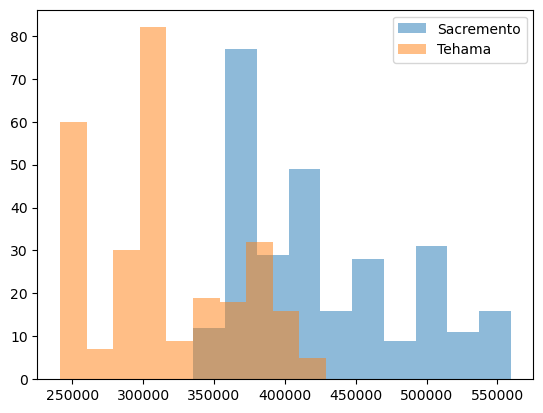

In [63]:
fig,ax=plt.subplots()
ax.hist(Sacramento_df['median_active_list_price'],alpha=.5,density=False,label='Sacremento')
ax.hist(Tehama_df['median_active_list_price'],alpha=.5,density=False,label='Tehama')
plt.legend()

;